In [31]:

import numpy as np 
import pandas as pd 
import datetime as dt 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

# Sets all rows to display
#pd.options.display.max_rows = None

#Stops a false alarm chaining error
pd.options.mode.chained_assignment = None

In [32]:
#Read the data of csv file
z_order=pd.read_csv('z_order.csv')
z_order.head(3)

,user_profile_id,order_id,order_date,sale_value,city_id,qty_sold
0,221.0,11680,12-05-2019,1778.0,8637.0,6
1,1078.0,12414,01-09-2019,1776.0,8586.0,4
2,1473.0,12879,04-02-2020,2140.0,8429.0,6


In [34]:
#Read the data of csv file
z_status=pd.read_csv('z_status.csv')
z_status.head(3)

,id,order_id,status,time_stamp
0,14708446,4030263,Ve,2019-01-01 00:02:05
1,14712917,4030263,Ba,2019-01-02 05:22:27
2,14722028,4030263,Pi,2019-01-02 17:39:11


In [35]:
z_items=pd.read_csv('z_items.csv')
z_items.head(3)

,id,order_id,product_name,quantity
0,14085411,4030264,BR,1
1,14085412,4030264,BR,1
2,14085413,4030264,BR,1


In [37]:
#mergin datafram column wise
total_data=pd.concat([z_order,z_status,z_items],axis=1)
total_data.head(5)

,user_profile_id,order_id,order_date,sale_value,city_id,qty_sold,id,order_id,status,time_stamp,id,order_id,product_name,quantity
0,221.0,11680,12-05-2019,1778.0,8637.0,6,14708446,4030263,Ve,2019-01-01 00:02:05,14085411,4030264,BR,1
1,1078.0,12414,01-09-2019,1776.0,8586.0,4,14712917,4030263,Ba,2019-01-02 05:22:27,14085412,4030264,BR,1
2,1473.0,12879,04-02-2020,2140.0,8429.0,6,14722028,4030263,Pi,2019-01-02 17:39:11,14085413,4030264,BR,1
3,685.0,13754,14-02-2019,2518.0,8473.0,3,14724114,4030263,Sh,2019-01-02 19:39:38,14085405,4030263,CM,1
4,6468.0,17700,30-11-2019,2516.0,8442.0,6,14746326,4030263,De,2019-01-04 11:36:00,14085406,4030263,CM,1


In [38]:
merge_data=pd.merge(z_items,z_status,how='right',on='order_id')
sorted_data = merge_data[merge_data['status'].isin(['Ba','De','Ve'])]
sorted_data.head(5)


,id_x,order_id,product_name,quantity,id_y,status,time_stamp
0,14085405.0,4030263,CM,1.0,14708446,Ve,2019-01-01 00:02:05
1,14085406.0,4030263,CM,1.0,14708446,Ve,2019-01-01 00:02:05
2,14085407.0,4030263,PN,1.0,14708446,Ve,2019-01-01 00:02:05
3,14085408.0,4030263,PN,1.0,14708446,Ve,2019-01-01 00:02:05
4,14085409.0,4030263,PN,1.0,14708446,Ve,2019-01-01 00:02:05


In [39]:
z_order.head()

,user_profile_id,order_id,order_date,sale_value,city_id,qty_sold
0,221.0,11680,12-05-2019,1778.0,8637.0,6
1,1078.0,12414,01-09-2019,1776.0,8586.0,4
2,1473.0,12879,04-02-2020,2140.0,8429.0,6
3,685.0,13754,14-02-2019,2518.0,8473.0,3
4,6468.0,17700,30-11-2019,2516.0,8442.0,6


In [40]:
final_data=pd.concat([z_order,sorted_data],axis=1)
final_data.dropna()




,user_profile_id,order_id,order_date,sale_value,city_id,qty_sold,id_x,order_id,product_name,quantity,id_y,status,time_stamp
0,221.0,11680.0,12-05-2019,1778.0,8637.0,6.0,14085405.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05
1,1078.0,12414.0,01-09-2019,1776.0,8586.0,4.0,14085406.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05
2,1473.0,12879.0,04-02-2020,2140.0,8429.0,6.0,14085407.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05
3,685.0,13754.0,14-02-2019,2518.0,8473.0,3.0,14085408.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05
4,6468.0,17700.0,30-11-2019,2516.0,8442.0,6.0,14085409.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,1554634.0,4102519.0,19-01-2019,1598.0,8444.0,6.0,14099482.0,4032486.0,BR,1.0,14716759.0,Ba,2019-01-02 12:24:28
49984,1206631.0,4102520.0,19-01-2019,1598.0,8297.0,6.0,14099483.0,4032486.0,BR,1.0,14716759.0,Ba,2019-01-02 12:24:28
49985,162276.0,4102521.0,19-01-2019,1598.0,8444.0,6.0,14099484.0,4032486.0,BR,1.0,14716759.0,Ba,2019-01-02 12:24:28
49986,1569530.0,4102522.0,19-01-2019,1598.0,8288.0,6.0,14099485.0,4032486.0,PN,1.0,14716759.0,Ba,2019-01-02 12:24:28


In [9]:

cleaned_data=final_data.dropna()
cleaned_data.head(100)

,user_profile_id,order_id,order_date,sale_value,city_id,qty_sold,id_x,order_id,product_name,quantity,id_y,status,time_stamp
0,221.0,11680.0,12-05-2019,1778.0,8637.0,6.0,14085405.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05
1,1078.0,12414.0,01-09-2019,1776.0,8586.0,4.0,14085406.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05
2,1473.0,12879.0,04-02-2020,2140.0,8429.0,6.0,14085407.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05
3,685.0,13754.0,14-02-2019,2518.0,8473.0,3.0,14085408.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05
4,6468.0,17700.0,30-11-2019,2516.0,8442.0,6.0,14085409.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,72117.0,272423.0,31-03-2019,1336.0,8370.0,6.0,14085404.0,4030262.0,SC,1.0,14712922.0,Ba,2019-01-02 05:22:32
162,81958.0,274433.0,02-02-2019,1998.0,8660.0,4.0,14085438.0,4030262.0,FG,1.0,14712922.0,Ba,2019-01-02 05:22:32
173,29646.0,306506.0,27-06-2019,1594.0,8660.0,5.0,14085401.0,4030262.0,BR,1.0,14748223.0,De,2019-01-04 09:20:04
174,80586.0,318574.0,03-07-2020,884.0,8459.0,3.0,14085402.0,4030262.0,BR,1.0,14748223.0,De,2019-01-04 09:20:04


In [50]:
from datetime import date
cleaned_data['order_date'] = pd.to_datetime(cleaned_data['order_date'])
cleaned_data.dtypes

cleaned_data.head()

,user_profile_id,order_id,order_date,sale_value,city_id,qty_sold,id_x,order_id,product_name,quantity,id_y,status,time_stamp,Join_date
0,221.0,11680.0,2019-12-05,1778.0,8637.0,6.0,14085405.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-12-05
1,1078.0,12414.0,2019-01-09,1776.0,8586.0,4.0,14085406.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-01-09
2,1473.0,12879.0,2020-04-02,2140.0,8429.0,6.0,14085407.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2020-04-02
3,685.0,13754.0,2019-02-14,2518.0,8473.0,3.0,14085408.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-02-14
4,6468.0,17700.0,2019-11-30,2516.0,8442.0,6.0,14085409.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-11-30


In [51]:

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [85]:
cleaned_data['join_date']=cleaned_data['order_date'].apply(get_month)
cleaned_data['CohortMonth'] = cleaned_data.groupby('user_profile_id')['join_date'].transform('min')
cleaned_data['CohortMonth']



0       2019-12-01
1       2019-01-01
2       2020-04-01
3       2019-02-01
4       2019-11-01
           ...    
49983   2019-01-01
49984   2019-01-01
49985   2019-01-01
49986   2019-01-01
49987   2019-01-01
Name: CohortMonth, Length: 27311, dtype: datetime64[ns]

In [56]:
cleaned_data.head(5)

,user_profile_id,order_id,order_date,sale_value,city_id,qty_sold,id_x,order_id,product_name,quantity,id_y,status,time_stamp,Join_date,join_date,CohortMonth
0,221.0,11680.0,2019-12-05,1778.0,8637.0,6.0,14085405.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-12-05,2019-12-01,2019-12-01
1,1078.0,12414.0,2019-01-09,1776.0,8586.0,4.0,14085406.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-01-09,2019-01-01,2019-01-01
2,1473.0,12879.0,2020-04-02,2140.0,8429.0,6.0,14085407.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2020-04-02,2020-04-01,2020-04-01
3,685.0,13754.0,2019-02-14,2518.0,8473.0,3.0,14085408.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-02-14,2019-02-01,2019-02-01
4,6468.0,17700.0,2019-11-30,2516.0,8442.0,6.0,14085409.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-11-30,2019-11-01,2019-11-01


In [57]:

#When passed a datetime column this functions splits out year, month, day

def get_date(cleaned_data, column):
    year = cleaned_data[column].dt.year
    month = cleaned_data[column].dt.month
    day = cleaned_data[column].dt.day
    return year, month, day

In [86]:
order_year, order_month,order_day = get_date(cleaned_data, 'order_date')
Cohort_year, Cohort_month,Cohort_day = get_date(cleaned_data, 'CohortMonth')
cleaned_data.head()
Cohort_year[:30]

0     2019
1     2019
2     2020
3     2019
4     2019
5     2020
6     2020
7     2021
8     2019
9     2021
10    2020
11    2019
24    2019
25    2019
26    2020
27    2019
28    2019
29    2019
36    2021
37    2021
38    2019
39    2021
40    2019
41    2019
48    2019
49    2019
50    2019
51    2019
52    2021
53    2019
Name: CohortMonth, dtype: int64

In [88]:
year_diff = order_year - Cohort_year
month_diff = order_month - Cohort_month
year_diff
month_diff

0        0
1        0
2        0
3        0
4        0
        ..
49983    0
49984    0
49985    0
49986    0
49987    0
Length: 27311, dtype: int64

In [60]:
cleaned_data['CohortIndex'] = year_diff * 12 + month_diff + 1
cleaned_data.head(5)

,user_profile_id,order_id,order_date,sale_value,city_id,qty_sold,id_x,order_id,product_name,quantity,id_y,status,time_stamp,Join_date,join_date,CohortMonth,CohortIndex
0,221.0,11680.0,2019-12-05,1778.0,8637.0,6.0,14085405.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-12-05,2019-12-01,2019-12-01,1
1,1078.0,12414.0,2019-01-09,1776.0,8586.0,4.0,14085406.0,4030263.0,CM,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-01-09,2019-01-01,2019-01-01,1
2,1473.0,12879.0,2020-04-02,2140.0,8429.0,6.0,14085407.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2020-04-02,2020-04-01,2020-04-01,1
3,685.0,13754.0,2019-02-14,2518.0,8473.0,3.0,14085408.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-02-14,2019-02-01,2019-02-01,1
4,6468.0,17700.0,2019-11-30,2516.0,8442.0,6.0,14085409.0,4030263.0,PN,1.0,14708446.0,Ve,2019-01-01 00:02:05,2019-11-30,2019-11-01,2019-11-01,1


In [61]:
cohort_data = cleaned_data.groupby(
    ['CohortMonth', 'CohortIndex'])['user_profile_id'].apply(pd.Series.nunique).reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,user_profile_id
0,2019-01-01,1,6755
1,2019-01-01,2,102
2,2019-01-01,3,92
3,2019-01-01,4,94
4,2019-01-01,5,88


In [62]:
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'user_profile_id')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,36
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2019-01-01,6755.0,102.0,92.0,94.0,88.0,51.0,64.0,84.0,90.0,80.0,...,3.0,5.0,1.0,4.0,2.0,1.0,NaN,1.0,NaN,1.0
2019-02-01,1355.0,22.0,14.0,15.0,10.0,14.0,14.0,21.0,24.0,27.0,...,3.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN
2019-03-01,1409.0,21.0,16.0,7.0,19.0,22.0,12.0,17.0,19.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2019-04-01,1291.0,25.0,11.0,23.0,16.0,18.0,19.0,21.0,21.0,7.0,...,3.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN
2019-05-01,1385.0,13.0,15.0,13.0,10.0,12.0,15.0,18.0,4.0,2.0,...,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2019-06-01,1249.0,8.0,7.0,14.0,5.0,16.0,9.0,4.0,6.0,4.0,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2019-07-01,1289.0,14.0,20.0,15.0,19.0,21.0,5.0,3.0,NaN,3.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,1155.0,13.0,14.0,18.0,16.0,6.0,1.0,1.0,NaN,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,1137.0,10.0,7.0,12.0,2.0,3.0,NaN,3.0,4.0,4.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:

cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis=0)
retention.round(3) 

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,36
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1.0,0.015,0.014,0.014,0.013,0.008,0.009,0.012,0.013,0.012,...,0.000,0.001,0.000,0.001,0.000,0.000,NaN,0.000,NaN,0.0
2019-02-01,1.0,0.016,0.010,0.011,0.007,0.010,0.010,0.015,0.018,0.020,...,0.002,0.001,NaN,NaN,0.001,0.001,NaN,NaN,0.001,NaN
2019-03-01,1.0,0.015,0.011,0.005,0.013,0.016,0.009,0.012,0.013,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001,0.001,NaN
2019-04-01,1.0,0.019,0.009,0.018,0.012,0.014,0.015,0.016,0.016,0.005,...,0.002,NaN,0.002,NaN,0.001,0.001,0.001,0.001,NaN,NaN
2019-05-01,1.0,0.009,0.011,0.009,0.007,0.009,0.011,0.013,0.003,0.001,...,NaN,NaN,0.001,0.001,NaN,NaN,0.001,NaN,NaN,NaN
2019-06-01,1.0,0.006,0.006,0.011,0.004,0.013,0.007,0.003,0.005,0.003,...,0.001,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN
2019-07-01,1.0,0.011,0.016,0.012,0.015,0.016,0.004,0.002,NaN,0.002,...,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,1.0,0.011,0.012,0.016,0.014,0.005,0.001,0.001,NaN,0.003,...,0.001,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,1.0,0.009,0.006,0.011,0.002,0.003,NaN,0.003,0.004,0.004,...,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


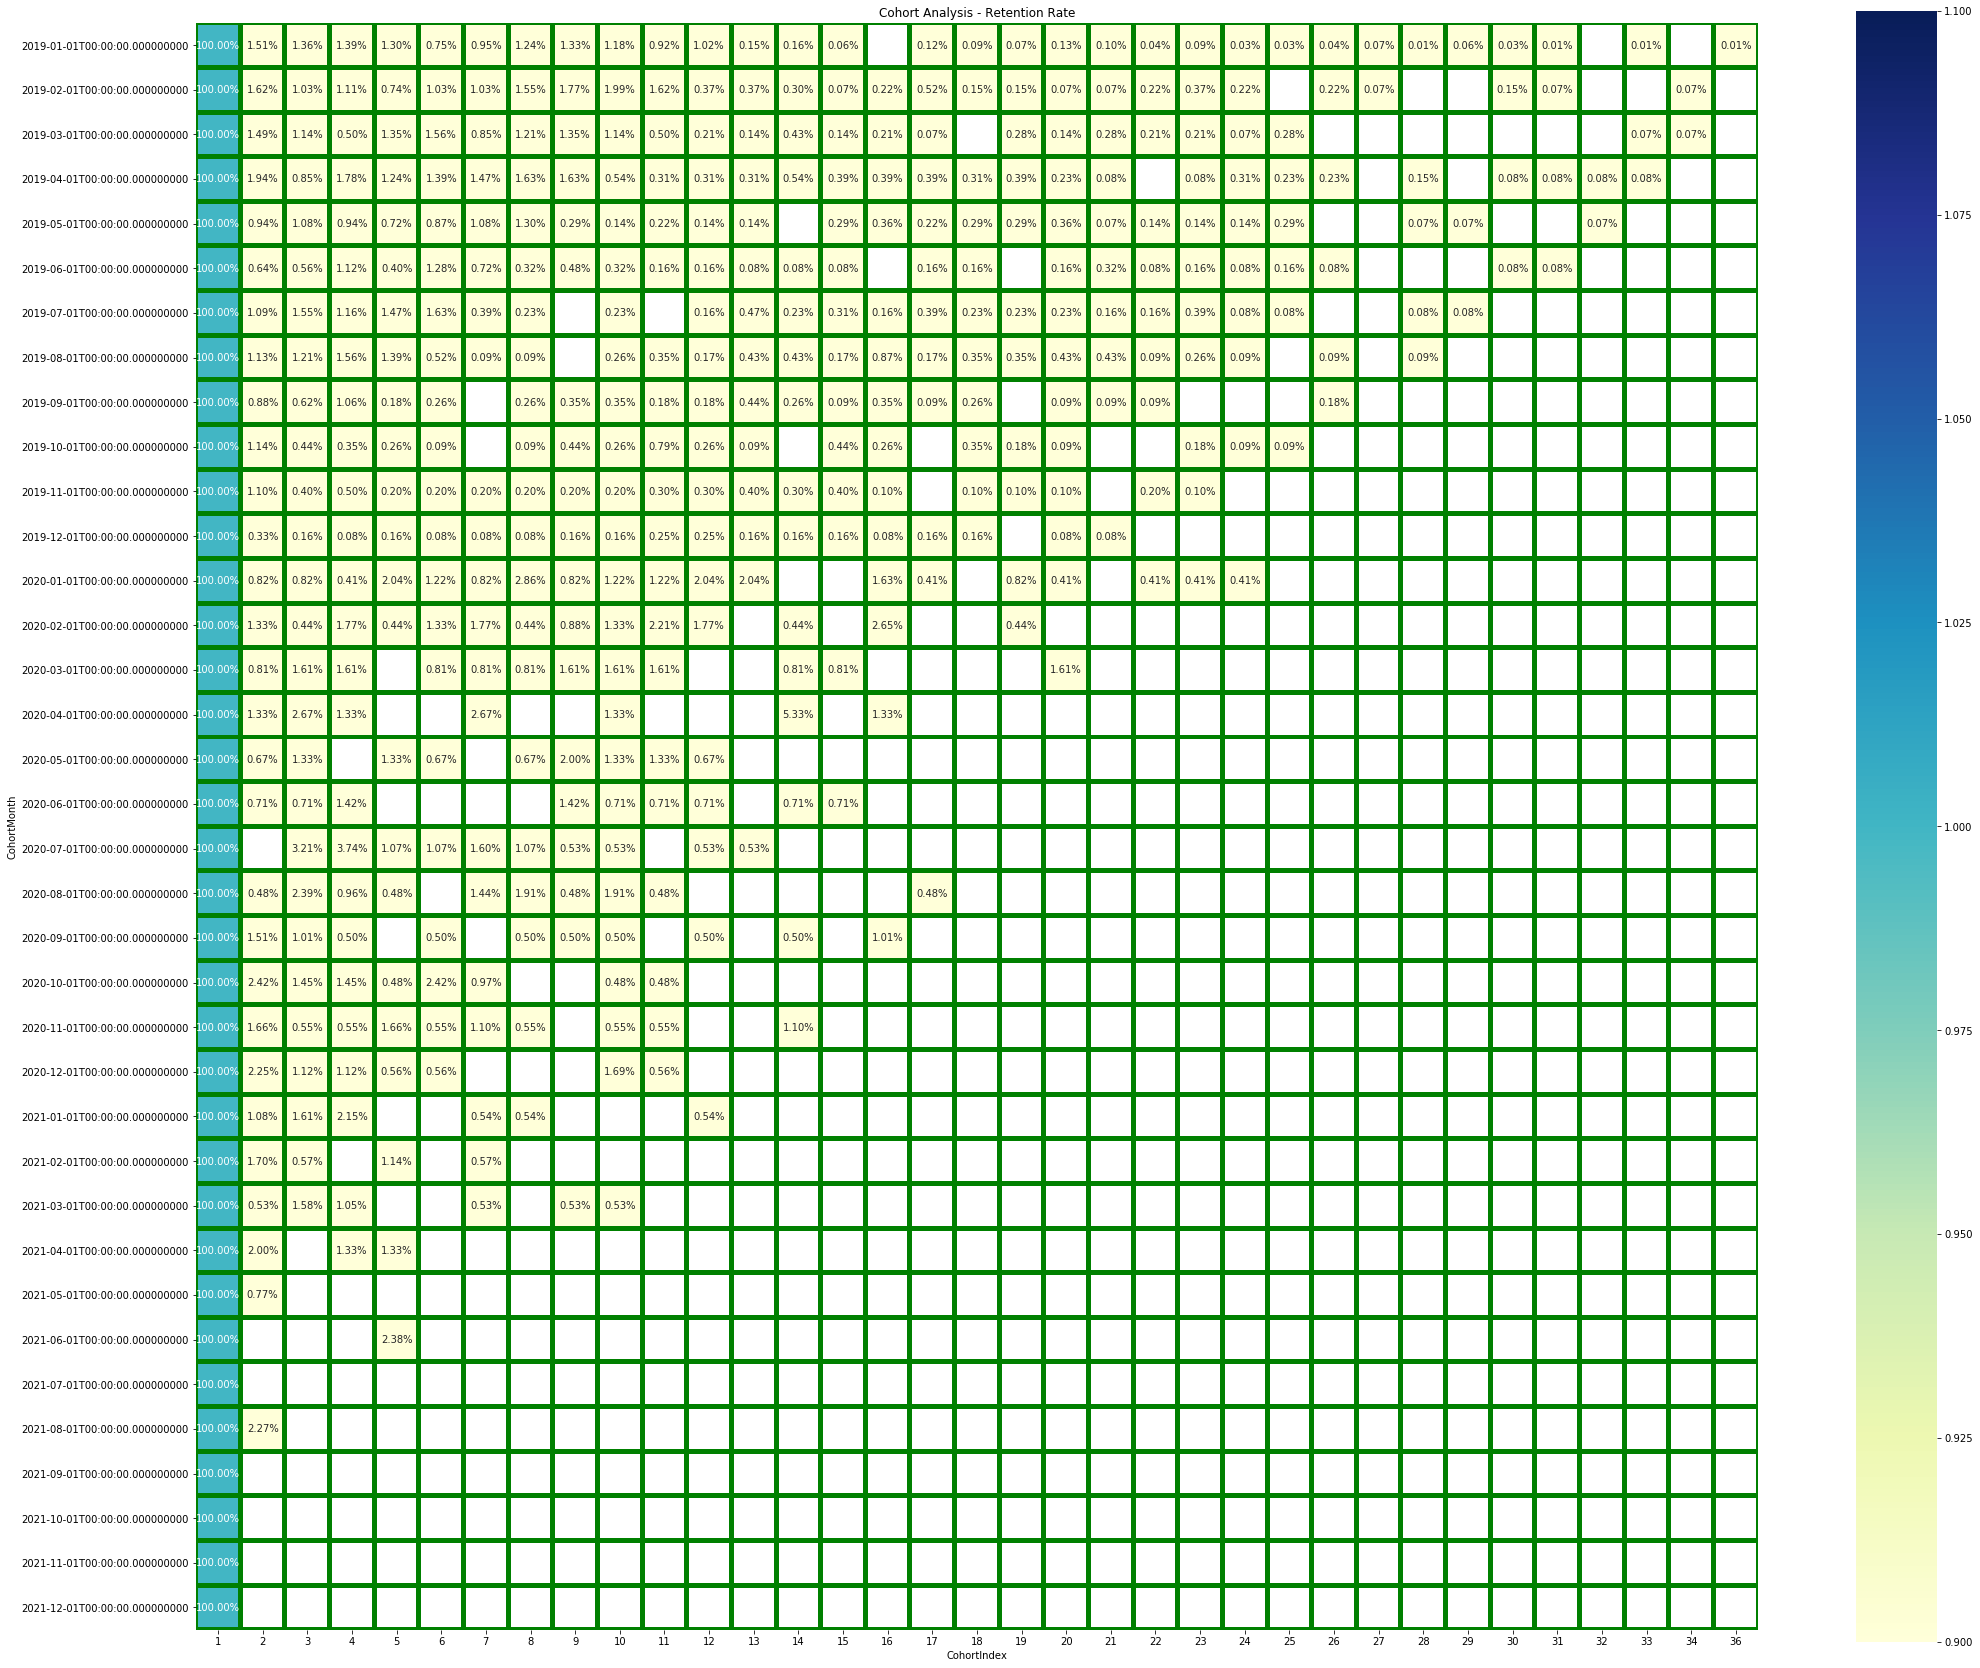

In [118]:

plt.figure(figsize = (35,30))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.2%', 
            vmin = 1,
            vmax = 1,
            square=True,
            cmap = "YlGnBu",
            linewidths=4,
            linecolor='green',
            robust=False,
            center=None,
           )

plt.show()
#click two time on map to zoom in map data

IndexError: Inconsistent shape between the condition and the input (got (36, 1) and (36,))

<Figure size 1800x1440 with 0 Axes>

In [93]:
cohort_size

CohortMonth
2019-01-01    6755.0
2019-02-01    1355.0
2019-03-01    1409.0
2019-04-01    1291.0
2019-05-01    1385.0
2019-06-01    1249.0
2019-07-01    1289.0
2019-08-01    1155.0
2019-09-01    1137.0
2019-10-01    1137.0
2019-11-01    1001.0
2019-12-01    1223.0
2020-01-01     245.0
2020-02-01     226.0
2020-03-01     124.0
2020-04-01      75.0
2020-05-01     150.0
2020-06-01     141.0
2020-07-01     187.0
2020-08-01     209.0
2020-09-01     199.0
2020-10-01     207.0
2020-11-01     181.0
2020-12-01     178.0
2021-01-01     186.0
2021-02-01     176.0
2021-03-01     190.0
2021-04-01     150.0
2021-05-01     259.0
2021-06-01      42.0
2021-07-01      47.0
2021-08-01      44.0
2021-09-01      48.0
2021-10-01      41.0
2021-11-01      46.0
2021-12-01      40.0
Name: 1, dtype: float64